In [1]:
!python -V

Python 3.9.19


In [3]:
import pandas as pd

In [4]:
import pickle

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [50]:
df = pd.read_parquet('./data/yellow_tripdata_2023-01.parquet')

# Question 1
len(df.columns)

In [60]:
df['duration'] = df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]
df['duration'] = df['duration'].apply(lambda td: td.total_seconds() / 60)

# Question 2
df['duration'].describe()

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration, dtype: float64

In [62]:
df_no_out = df[(df.duration >= 1) & (df.duration <= 60)]

# Question 3
print(len(df_no_out)/len(df))

0.9812202822125979


In [66]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

df_no_out[categorical] = df_no_out[categorical].astype(str)

train_dicts = df_no_out[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

# Question 4
print(X_train.shape)

/tmp/ipykernel_41746/3963175721.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_out[categorical] = df_no_out[categorical].astype(str)


(3009173, 516)


In [67]:
target = 'duration'
y_train = df_no_out[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

# Question 5
mean_squared_error(y_train, y_pred, squared=False)

/home/marcos/miniconda3/envs/mlops_C01/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


7.658403313430495

/tmp/ipykernel_41746/1672306066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/home/marcos/miniconda3/envs/mlops_C01/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_41746/1672306066.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an 

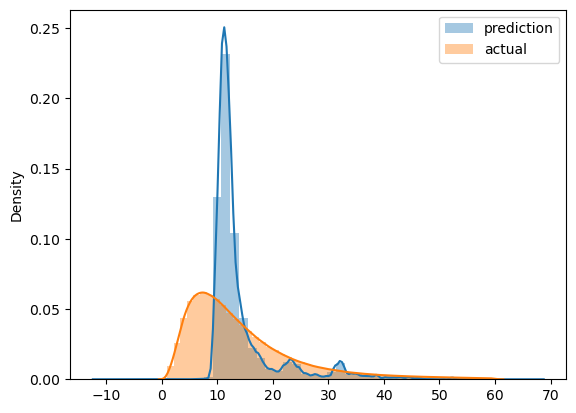

In [68]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [10]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])
        df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [11]:
df_train = read_dataframe('./data/yellow_tripdata_2023-01.parquet')
df_val = read_dataframe('./data/yellow_tripdata_2023-02.parquet')

In [12]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [20]:
#categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
#numerical = ['trip_distance']
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']


dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [21]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

# Question 6
mean_squared_error(y_val, y_pred, squared=False)

/home/marcos/miniconda3/envs/mlops_C01/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


7.819941908108872

: 

In [17]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

FileNotFoundError: [Errno 2] No such file or directory: 'models/lin_reg.bin'

In [16]:
#lr = Lasso(0.01)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

# Question 6
mean_squared_error(y_val, y_pred, squared=False)

/home/marcos/miniconda3/envs/mlops_C01/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


9.395699095576239